In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
train_set=train_data.flow_from_directory(
    "lung/Train",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 1500 images belonging to 3 classes.


In [3]:
val_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
val_set=train_data.flow_from_directory(
    "lung/Val",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 300 images belonging to 3 classes.


In [4]:
test_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
test_set=train_data.flow_from_directory(
    "lung/Test",
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'sparse'
)

Found 900 images belonging to 3 classes.


In [5]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 224, 224, 3)


In [6]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
# Load the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



87910968/87910968 [==============================] - 36s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# Add your own layers
x = GlobalAveragePooling2D()(inception.output)
x = Dense(1024, activation='relu')(x)  # You can add more dense layers if needed
prediction = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=30,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

Epoch 1/30


47/47 [==============================] - 271s 6s/step - loss: 0.5946 - accuracy: 0.8067 - val_loss: 0.2036 - val_accuracy: 0.9100
Epoch 2/30
47/47 [==============================] - 252s 5s/step - loss: 0.2168 - accuracy: 0.9120 - val_loss: 0.2004 - val_accuracy: 0.9200
Epoch 3/30
47/47 [==============================] - 296s 6s/step - loss: 0.2006 - accuracy: 0.9113 - val_loss: 0.2122 - val_accuracy: 0.9233
Epoch 4/30
47/47 [==============================] - 257s 5s/step - loss: 0.2124 - accuracy: 0.9153 - val_loss: 0.2261 - val_accuracy: 0.9067
Epoch 5/30
47/47 [==============================] - 293s 6s/step - loss: 0.1545 - accuracy: 0.9440 - val_loss: 0.2031 - val_accuracy: 0.9200
Epoch 6/30
47/47 [==============================] - 285s 6s/step - loss: 0.1511 - accuracy: 0.9420 - val_loss: 0.2179 - val_accuracy: 0.9067
Epoch 7/30
47/47 [==============================] - 249s 5s/step - loss: 0.1400 - accuracy: 0.9387 - val_loss: 0.1254 - val_accuracy: 0.9467
Epoch 8/30


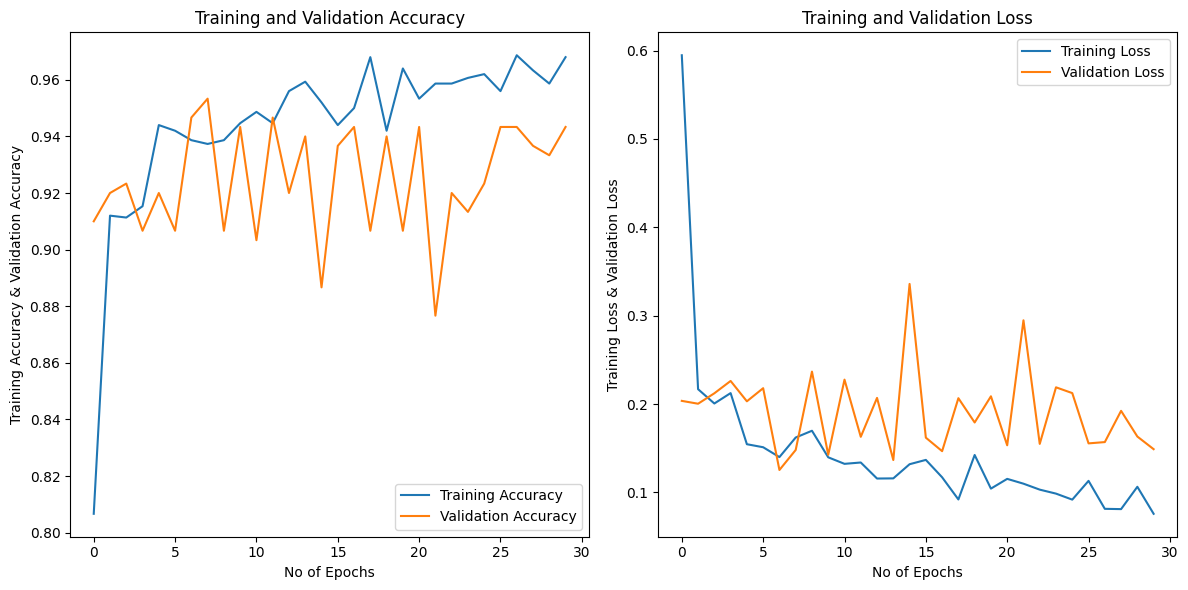

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy')
plt.plot( val_acc, label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()

# Save the figure
plt.savefig('Inception_training_validation_accuracy_loss.png')

plt.show()

In [17]:
loss,accuracy=model.evaluate(train_set)


47/47 [==============================] - 219s 5s/step - loss: 0.1207 - accuracy: 0.9607


In [19]:
accuracy*100


96.06666564941406

In [20]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

10/10 [==============================] - 43s 4s/step - loss: 0.1311 - accuracy: 0.9433


94.33333277702332

In [24]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

29/29 [==============================] - 127s 4s/step - loss: 0.1633 - accuracy: 0.9411


94.11110877990723

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: squamous_carcinoma
1/1 [==============================] - 7s 7s/step
predicted label: squamous_carcinoma


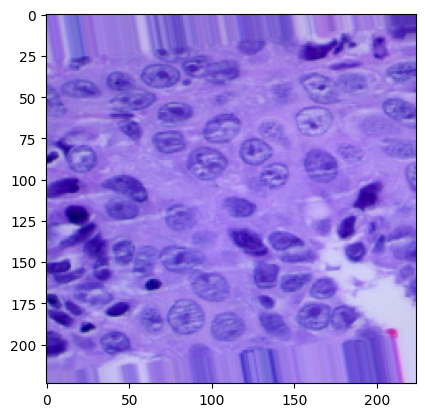

In [26]:
import numpy as np
for images_batch, labels_batch in test_set:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 0s 208ms/step


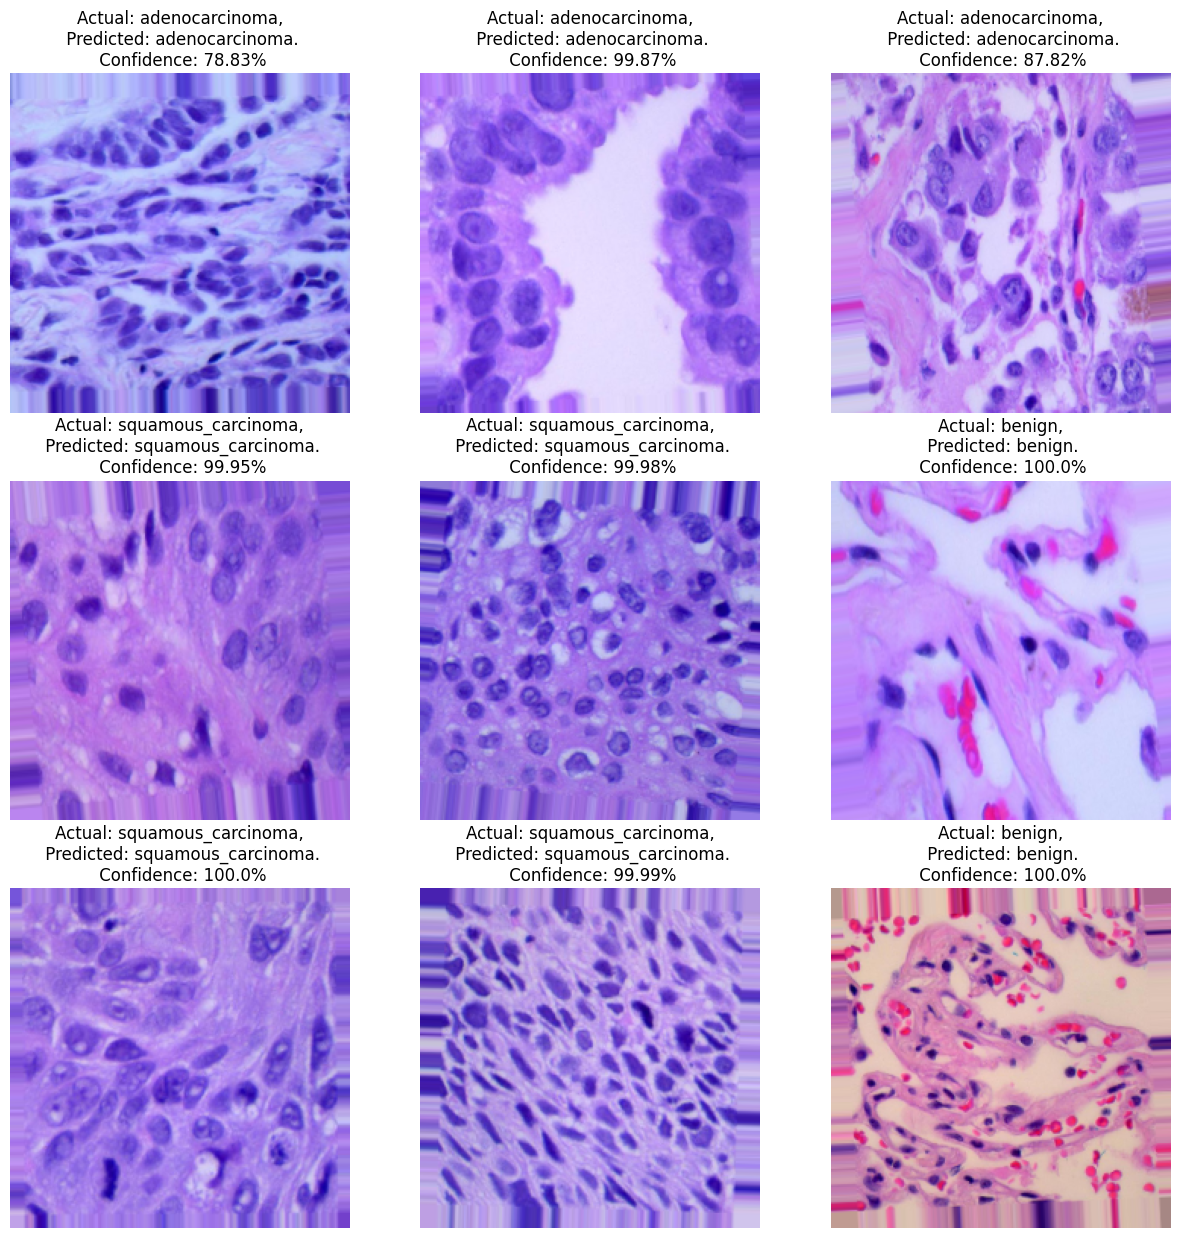

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Generating predictions...
4/4 [==============================] - 16s 4s/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.97      0.85      0.91        40
            benign       0.94      1.00      0.97        48
squamous_carcinoma       0.93      0.97      0.95        40

          accuracy                           0.95       128
         macro avg       0.95      0.94      0.94       128
      weighted avg       0.95      0.95      0.94       128

Generating confusion matrix...


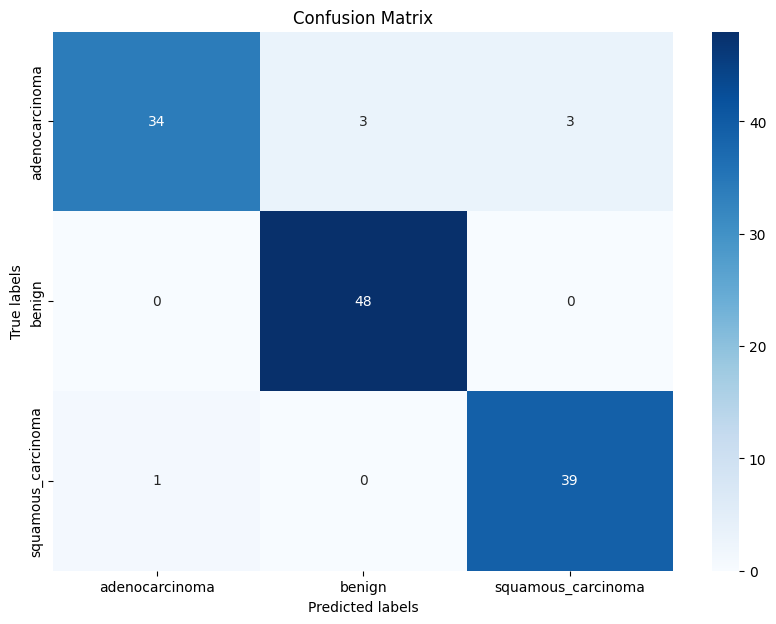

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the figure
plt.savefig('inception_confusion_matrix.png')

plt.show()

4/4 [==============================] - 11s 2s/step


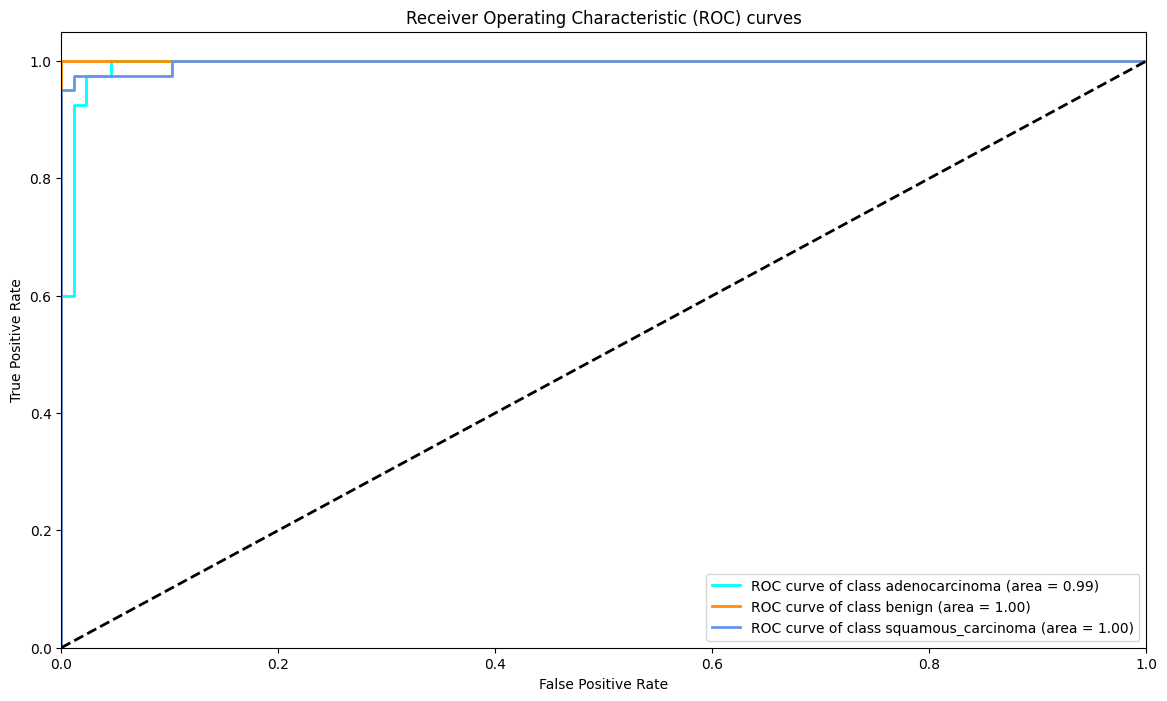

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming class_names is already defined
n_classes = len(class_names)

# Binarize the test labels
y_test_bin = label_binarize(test_labels_subset, classes=[0, 1, 2])

# Compute probabilities
y_score = model.predict(test_images_subset)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(14, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")  # Save the figure
plt.savefig('Inception_ROC.png')
plt.show()